In [1]:
# Imports
import numpy as np
from IPython.display import clear_output
from E2_AnalysisHelpers import *
from matplotlib import pyplot as plt
from scipy.stats import linregress
from sklearn import datasets

rnds = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13",
        "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25"]
yrs = ["2021", "2020", "2019", "2018", "2017", "2016", "2015", "2014",
       "2013", "2012", "2011", "2010", "2009", "2008", "2007", "2006"]

thisYr = "2021"
thisRnd = "16"

print("done")

done


In [2]:
# collate all pre-race dataframes, and add column of race finishing positions
pas = "empty"
dF = []

print("--------------------------------\ngetting dataframes and collating\n--------------------------------\n")
for yr in yrs:
    print("   " + yr)
    dF, pas = getWholeFrame(pas, dF, yr)

# add weather
wF = mergeWeather(dF)

clear_output(wait=True)
print("--------------------------------\ngot dataframes and weather\n--------------------------------\n")
print("done")

--------------------------------
got dataframes and weather
--------------------------------

done


In [3]:
nf = wF
thisYr = int(thisYr)
thisRnd = int(thisRnd)
recentDF = nf.loc[(nf["yr"] == thisYr) & (nf["rnd"] == thisRnd)]
lstYr = int(thisYr) - 1
thisTrk = recentDF["trk"].iloc[0]

lastDF = nf.loc[(nf["yr"] == lstYr) & (nf["trk"] == thisTrk)]
lstRnds = lastDF.rnd.unique()
lstRnds

array([7, 8], dtype=int64)

In [5]:
frames = []

for rnd in lstRnds:
    files = getFiles(csvFinalDir, f"{lstYr}-MotoGP-Rnd_{rnd}-Result.csv")
    for file in files:
        frame = pd.read_csv(file)
        frames.append(frame)

lstFrame = pd.concat(frames)
lDF = lstFrame.drop(["run_num", 'index', 'month', 'day', 'f_tire', 'r_tire', 'laps_on_f', 'laps_on_r', 'f_name', 'l_name', 'nat',
                   'num_of_laps', 'avg_spd', 'start_pos', 'one_val', 'two_val', 'thr_val', 'four_val', 'lap_time',
                   'lap_val', 'pit', 'sec_one', 'sec_two', 'sec_thr', 'sec_four', "one_seconds", "two_seconds", "thr_seconds", 
                    "four_seconds"], axis = 1)

lDF = lDF[lDF.lap_scaled != 1]
lDF = lDF[lDF.one_scaled != 1]
lDF = lDF[lDF.two_scaled != 1]
lDF = lDF[lDF.thr_scaled != 1]
lDF = lDF[lDF.fr_scaled != 1]
lDF = lDF[lDF["lap_seconds"].notna()]
lDF = lDF[lDF["one_scaled"].notna()]
lDF = lDF[lDF["two_scaled"].notna()]
lDF = lDF[lDF["thr_scaled"].notna()]
lDF = lDF[lDF["fr_scaled"].notna()]

print("done")

done


In [6]:
lapNums = []
laps = lDF.lap_num.unique()
nlDF = lDF[lDF["lap_seconds"].notna()]
# lDF = lDF.loc[(lDF["manu"] == "Honda")]

laps.sort()
for lap in laps[:-1]: lapNums.append(lap)

means = []
xLaps = []

for lap in lapNums:
    lapDF = nlDF.loc[nlDF["lap_num"] == lap]
    lapDF = lapDF[lapDF["lap_seconds"].notna()]

    mean = float(lapDF[["lap_seconds"]].mean())
    means.append(mean)
    xLaps.append(lap)
    print(f"{lap}   {mean}")

clear_output(wait=True)
print("done")

done


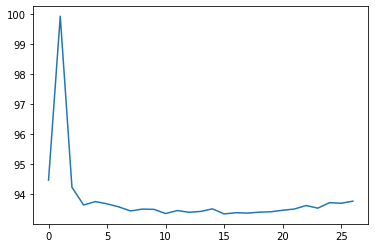

In [7]:
aLaps = np.array(xLaps)
aMeans = np.array(means)

# Create a graph based upon the list and array we have created
plt.plot(aLaps, aMeans)
# Show the graph that we have created
plt.show()


r-squared value of Section One = 0.41369236214669736


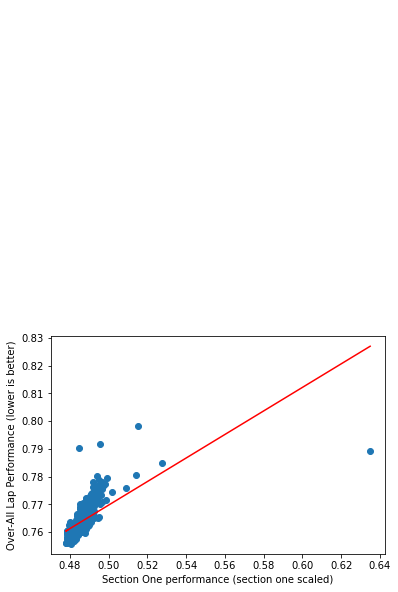

In [9]:
################################################################################################################################
# get R value of the track section one
nlDF = lDF[lDF.rnd != 8]
nlDF = nlDF[nlDF.lap_num != 1]
sec = "one"

xVals = nlDF[f"{sec}_scaled"]
yVals = nlDF["lap_scaled"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(xVals, yVals)
regress_values = xVals * slope + intercept

plt.scatter(xVals, yVals)
plt.plot(xVals, regress_values, "r-")
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq,(.5,.945),fontsize=15,color="red")

plt.xlabel(f"Section {sec.capitalize()} performance (section one scaled)")
plt.ylabel("Over-All Lap Performance (lower is better)")

print(f"r-squared value of Section {sec.capitalize()} = {rvalue**2}")
plt.show()
################################################################################################################################

r-squared value of Section Two = 0.4639764230775438


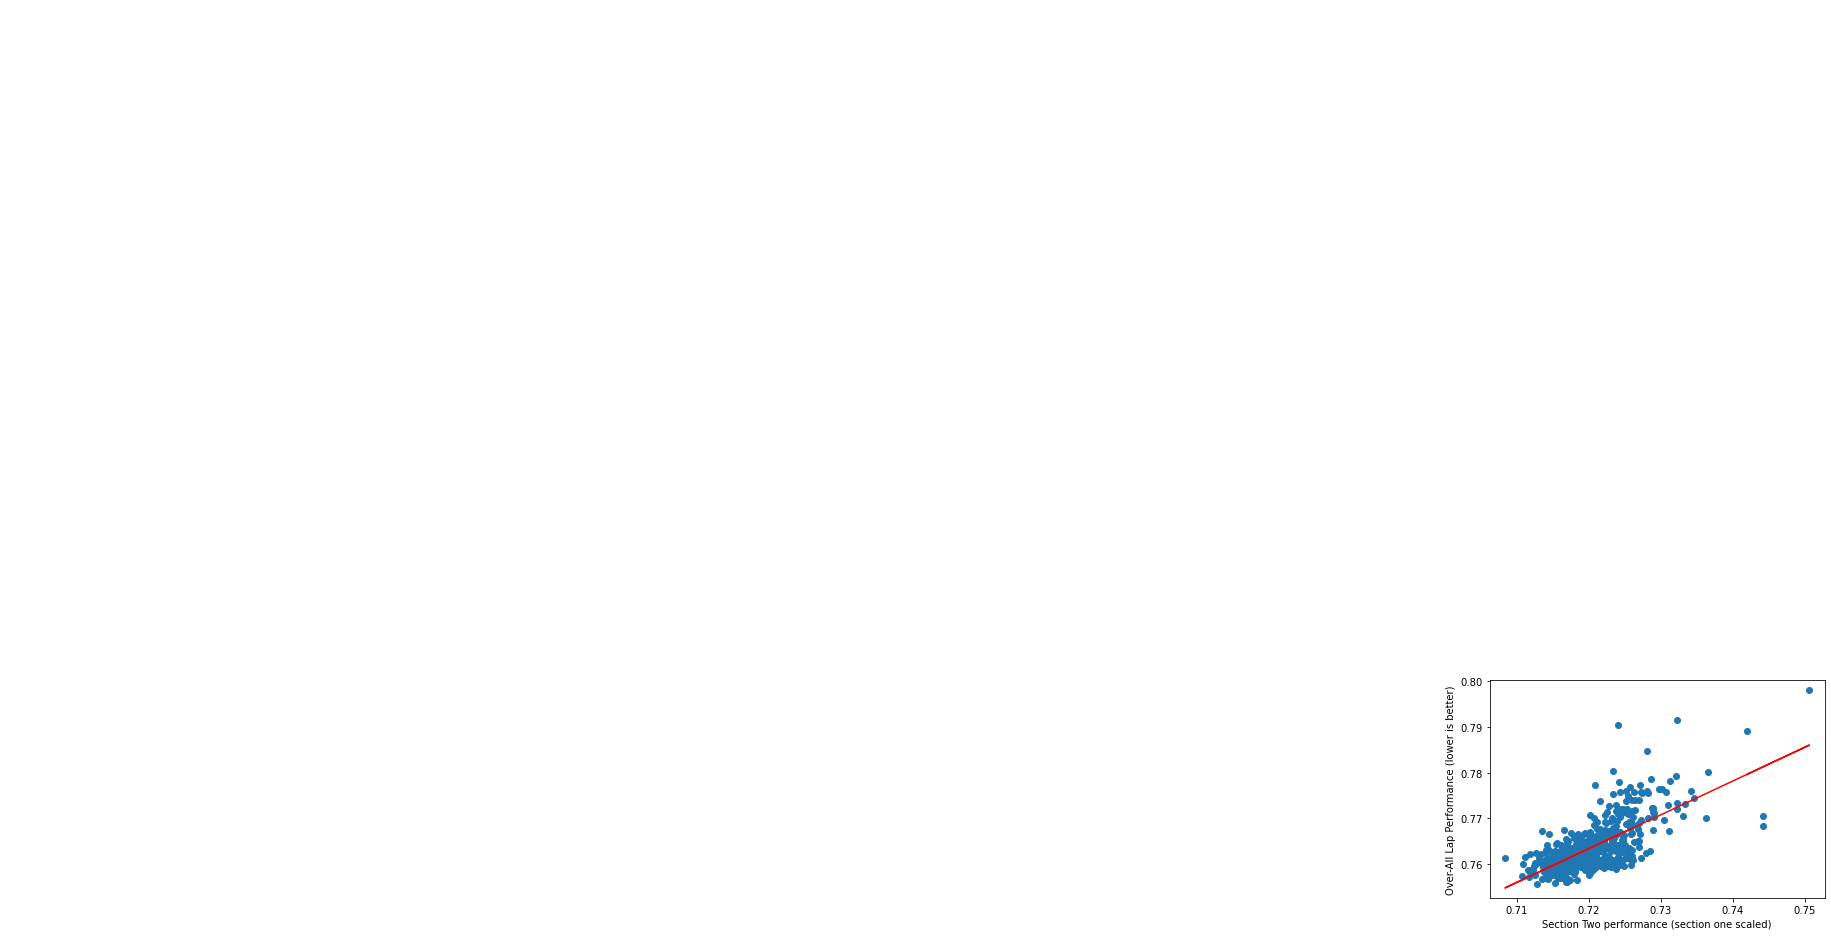

In [11]:
# get R value of the track section one
nlDF = lDF[lDF.rnd != 8]
nlDF = nlDF[nlDF.lap_num != 1]
sec = "two"

xVals = nlDF[f"{sec}_scaled"]
yVals = nlDF["lap_scaled"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(xVals, yVals)
regress_values = xVals * slope + intercept

plt.scatter(xVals, yVals)
plt.plot(xVals, regress_values, "r-")
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq,(.5,.945),fontsize=15,color="red")

plt.xlabel(f"Section {sec.capitalize()} performance (section one scaled)")
plt.ylabel("Over-All Lap Performance (lower is better)")

print(f"r-squared value of Section {sec.capitalize()} = {rvalue**2}")
plt.show()

r-squared value of Section Thr = 0.6504321122057316


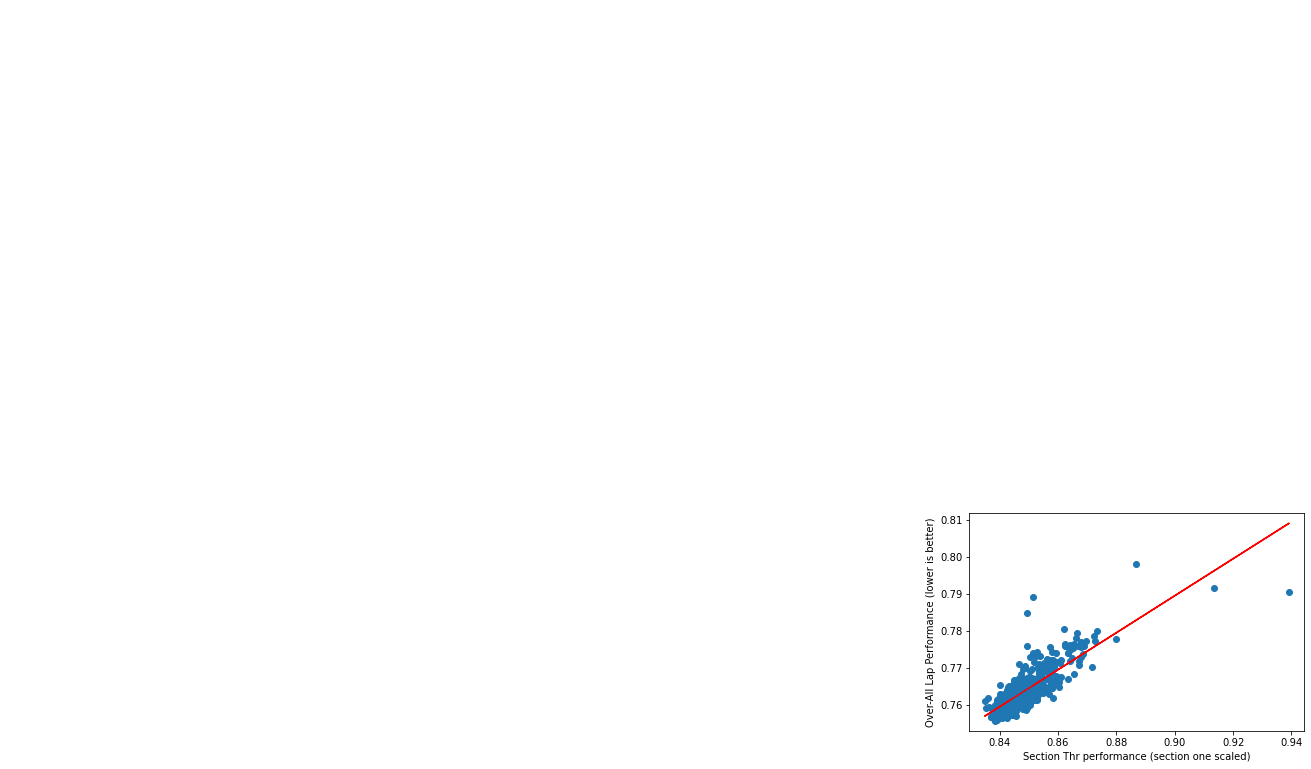

In [151]:
# get R value of the track section one
nlDF = lDF[lDF.rnd != 8]
nlDF = nlDF[nlDF.lap_num != 1]
sec = "thr"

xVals = nlDF[f"{sec}_scaled"]
yVals = nlDF["lap_scaled"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(xVals, yVals)
regress_values = xVals * slope + intercept

plt.scatter(xVals, yVals)
plt.plot(xVals, regress_values, "r-")
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq,(.5,.945),fontsize=15,color="red")

plt.xlabel(f"Section {sec.capitalize()} performance (section one scaled)")
plt.ylabel("Over-All Lap Performance (lower is better)")

print(f"r-squared value of Section {sec.capitalize()} = {rvalue**2}")
plt.show()

r-squared value of Section Fr = 0.5323758277009188


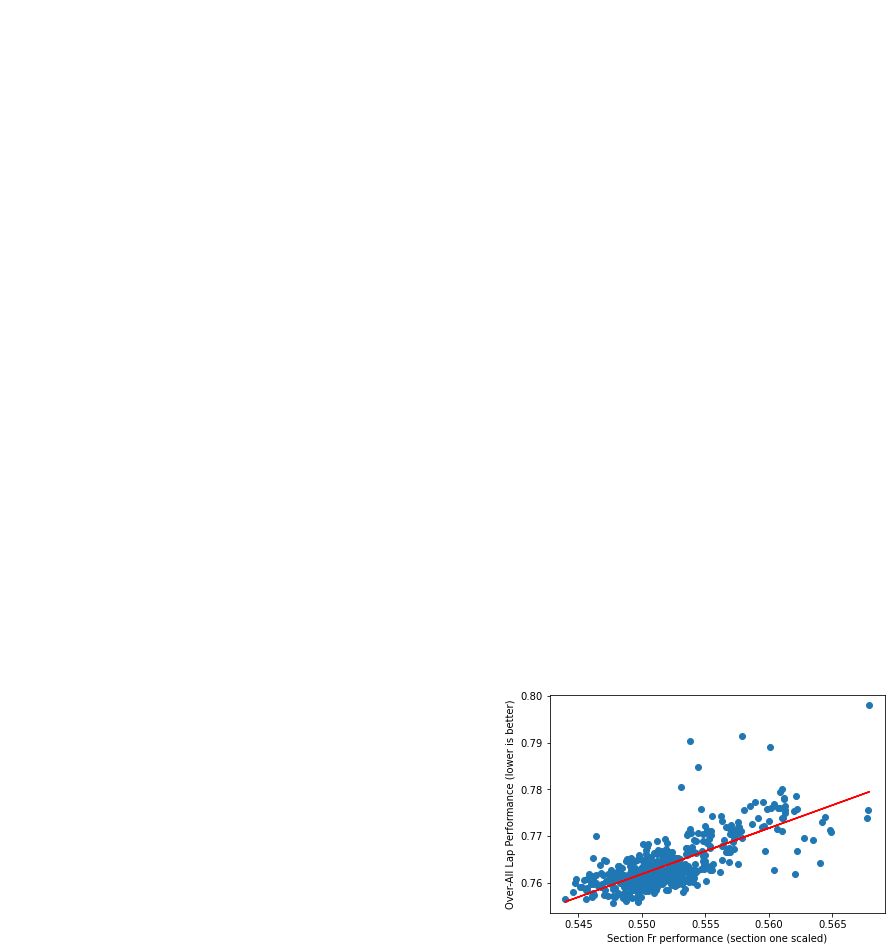

In [14]:
# get R value of the track section one
nlDF = lDF[lDF.rnd != 8]
nlDF = nlDF[nlDF.lap_num != 1]
sec = "fr"

xVals = nlDF[f"{sec}_scaled"]
yVals = nlDF["lap_scaled"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(xVals, yVals)
regress_values = xVals * slope + intercept

plt.scatter(xVals, yVals)
plt.plot(xVals, regress_values, "r-")
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq,(.5,.945),fontsize=15,color="red")

plt.xlabel(f"Section {sec.capitalize()} performance (section one scaled)")
plt.ylabel("Over-All Lap Performance (lower is better)")

print(f"r-squared value of Section {sec.capitalize()} = {rvalue**2}")
plt.show()

In [155]:
nlDF = lDF[lDF.lap_num != 1]
nlDF = nlDF[nlDF.rnd != 7]
nlDF.groupby("manu", as_index = False)["one_scaled"].mean()

,manu,one_scaled
0,Aprilia,0.589597
1,Ducati,0.587876
2,Honda,0.586385
3,KTM,0.586176
4,Suzuki,0.585341
5,Yamaha,0.583985


In [ ]:
# pd.set_option("display.max_rows", None, "display.max_columns", None)

# nF = nFrame.drop(["run_num", "f_tire", "r_tire", "laps_on_f", "laps_on_r", "pit", "lge", "rnd", "trk", "manu", "index",
#                   "month", "day", "yr", "pos", "nat", "num_of_laps", "lap_num", "lap_time", "lap_val", "sec_one", "one_val",
#                   "sec_two", "two_val", "sec_thr", "thr_val", "sec_four", "four_val", "avg_spd"], axis = 1)

# val = {"result": "DNF"}
# xf = nF.fillna(value = val)
# xf = xf[["session", "f_name", "l_name", "rdr_num", "team", "lap_seconds", "lap_scaled", "one_seconds", "one_scaled",
#          "two_seconds", "two_scaled", "thr_seconds", "thr_scaled", "four_seconds", "fr_scaled", "start_pos", "result"]]

# yf = xf.sort_values(by=["session", "result"])

# yf